# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

%matplotlib inline

In [2]:
from utils.data_gen import compute_bayes_risk_binary, compute_bayes_risk_binary_label_shift,\
    generate_2d_example

In [3]:
sns.set(style="whitegrid",
        font_scale=1.4,
        rc={
            "lines.linewidth": 2,
#             "axes.facecolor": ".9",
            'figure.figsize': (12, 6)
        })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [12]:
# legend_dict = ['$\{0\}$', '$\{1\}$']
# clr1 =  np.array([193, 142, 206]) / 256
# clr2 = np.array([125, 225, 125]) / 256
# colors = [clr1,clr2]

In [13]:
legend_dict = ['$\{0\}$', '$\{1\}$']
clr1 = np.array([233, 113, 150]) / 256
clr2 = np.array([113, 193, 125]) / 256
colors = [clr1,clr2]

In [46]:
legend_dict = ['$\{0\}$', '$\{1\}$']
clr1 = np.array([136,174,208]) / 256
clr2 = np.array([255,212,0]) / 256
colors = [clr1,clr2]

In [14]:
# legend_dict = ['$\{0\}$', '$\{1\}$']
# # clr1 =  np.array([193, 142, 206]) / 256
# # clr2 = np.array([125, 225, 125]) / 256
# colors = [clr1,clr2]

In [15]:
%load_ext autoreload
%autoreload 2

# Label shift

## well-separated

In [16]:
mu_1 = np.array([2,0])
mu_0 = np.array([-2,0])

In [17]:
X,y = generate_2d_example(0.7, mu_0, mu_1, 2000)

In [19]:
X,y = generate_2d_example(0.3, mu_0, mu_1, 2000)

In [21]:
n=200

In [22]:
x_source,y_source = generate_2d_example(0.7, mu_0, mu_1, n)
x_target,y_target = generate_2d_example(0.3, mu_0, mu_1, n)

In [28]:
import matplotlib.patches as mpatches

In [29]:
from matplotlib.patches import Polygon, Patch

In [47]:
src_0 = mpatches.Circle((0, 0), 0.25, facecolor=clr1, label='Class 0, source')
src_1 = mpatches.Polygon([[0, 0], [0.5, 1], [1, 0]],
                         facecolor=clr2,
                         label='Class 1, source')
targ_0 = mpatches.Circle((0, 0),
                         0.25,
                         facecolor=clr1,
                         hatch=3 * 'o',
                         edgecolor='black',
                         label='Class 0, target')
targ_1 = mpatches.Polygon([[0, 0], [0.5, 1], [1, 0]],
                          facecolor=clr2,
                          hatch=3 * 'o',
                          edgecolor='black',
                          label='Class 1, target')

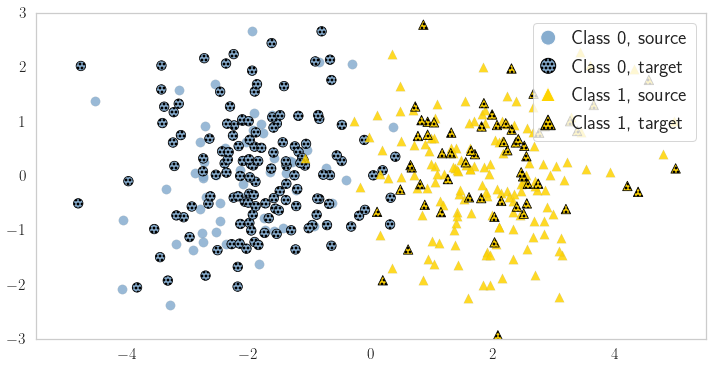

In [48]:
plt.figure(figsize=[12, 6])
plt.scatter(
    x_source[y_source == 0, 0],
    x_source[y_source == 0, 1],
    edgecolor="gray",
    #     linestyle='dashed',
    linewidths=0.1,
    marker='o',
    label='Class 0, source',
                alpha=0.85,
    s=90,
    color=colors[0].reshape(1, -1))

plt.scatter(
    x_target[y_target == 0, 0],
    x_target[y_target == 0, 1],
    edgecolor="black",
    linewidths=0.75,
    marker='o',
    label='Class 0, target',
    hatch=3 * 'o',
    #             alpha=0.9,
    s=90,
    color=colors[0].reshape(1, -1))

plt.scatter(
    x_source[y_source == 1, 0],
    x_source[y_source == 1, 1],
    edgecolor="gray",
    #     linestyle='dashed',
    linewidths=0.1,
    marker='^',
    label='Class 1, source',
                alpha=0.85,
    s=90,
    color=colors[1].reshape(1, -1))

plt.scatter(
    x_target[y_target == 1, 0],
    x_target[y_target == 1, 1],
    edgecolor="black",
    linewidths=0.75,
    marker='^',
    hatch=3 * 'o',
    #                 alpha=0.99,
    s=90,
    color=colors[1].reshape(1, -1),
    label='Class 1, target')

plt.legend(handles=[src_0, targ_0, src_1, targ_1],
           handler_map={
               mpatches.Circle: HandlerEllipse(),
               mpatches.Polygon: PolygonN()
           },
           handlelength=0.75,
           handleheight=0.75,
           loc=1,
           markerscale=1,
           prop={'size': 20})
# plt.legend()

# plt.plot(x_circ, y_circ, c='black', linewidth=1.5, linestyle='dashed')

plt.xlim([-5.5, 5.5])
plt.ylim([-3, 3])
plt.grid(False)
plt.savefig('img/benign_label_both.pdf', bbox_inches='tight')

In [33]:
class PolygonN(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        aspect= height/float(width)
        verts = orig_handle.get_xy()
        minx, miny = verts[:,0].min(), verts[:,1].min()
        maxx, maxy = verts[:,0].max(), verts[:,1].max()
        aspect= (maxy-miny)/float((maxx-minx))
        nvx = (verts[:,0]-minx)*float(height)/aspect/(maxx-minx)-x0
        nvy = (verts[:,1]-miny)*float(height)/(maxy-miny)-y0

        p = Polygon(np.c_[nvx, nvy])
        p.update_from(orig_handle)
        p.set_transform(handlebox.get_transform())

        handlebox.add_artist(p)
        return p

In [34]:
from matplotlib.legend_handler import HandlerPatch

In [35]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

# Covariate shift

In [52]:
n=2000

In [53]:
x = np.random.uniform(size=[n,2])

In [54]:
y_labels = ((x[:,0]**2 + x[:,1]**2)+np.random.normal(scale=0.1,size=n)>=1/4)

In [55]:
np.random.normal(scale=0.1,size=n)

array([-0.09488673, -0.03858432,  0.02684989, ..., -0.03396087,
       -0.03464737, -0.08841892])

In [56]:
# y_labels = np.random.binomial(n=1,p=y_probs)

In [70]:
x_circ = np.linspace(-0.2,0.5,num=100)

In [71]:
y_circ =np.sqrt(0.5**2-x_circ**2)

In [72]:
x_circ_2 = np.linspace(0.5,0.3,num=100)

In [73]:
y_circ_2 =-np.sqrt(0.5**2-x_circ_2**2)

In [74]:
x_circ_tot= np.hstack([x_circ,x_circ_2])

In [75]:
x_circ_tot.shape

(200,)

In [76]:
y_circ_tot= np.hstack([y_circ,y_circ_2])

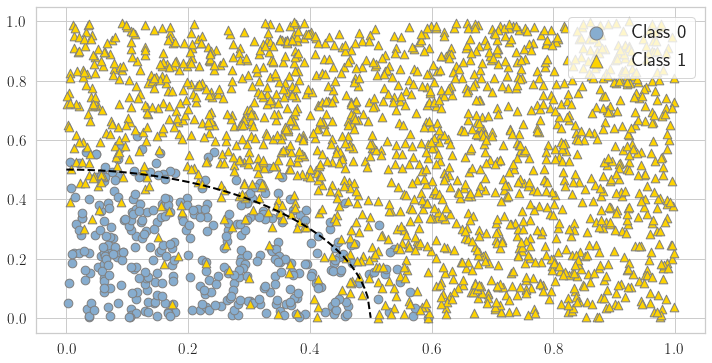

In [59]:
plt.figure(figsize=[12, 6])
plt.scatter(x[y_labels == 0, 0],
            x[y_labels == 0, 1],
            edgecolor="gray",
            marker='o',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(x[y_labels == 1, 0],
            x[y_labels == 1, 1],
            edgecolor="gray",
            marker='^',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.plot(x_circ,y_circ, c='black', linewidth=2, linestyle='dashed')

plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
# plt.show()
plt.savefig('img/benign_covariate_source.pdf', bbox_inches='tight')

In [60]:
x = np.random.beta(a=1,b=2,size=[n,2])

In [61]:
# y_probs = (x[:,0]**2 + x[:,1]**2)/2

In [62]:
y_labels = ((x[:,0]**2 + x[:,1]**2)+np.random.normal(scale=0.1,size=n)>=1/4)

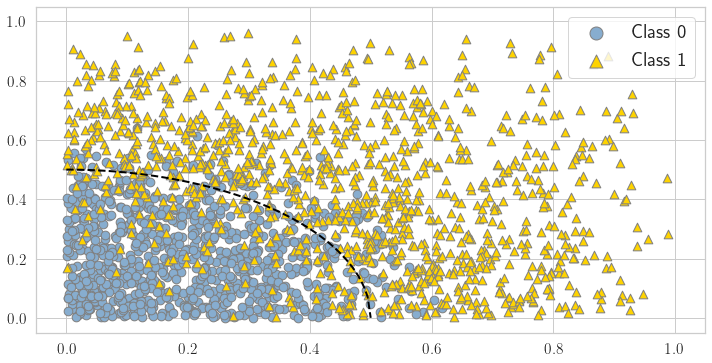

In [63]:
plt.figure(figsize=[12, 6])
plt.scatter(x[y_labels == 0, 0],
            x[y_labels == 0, 1],
            edgecolor="gray",
            marker='o',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(x[y_labels == 1, 0],
            x[y_labels == 1, 1],
            edgecolor="gray",
            marker='^',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.plot(x_circ,y_circ, c='black', linewidth=2, linestyle='dashed')
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
# plt.show()
plt.savefig('img/benign_covariate_target.pdf', bbox_inches='tight')

In [64]:
n=200

In [65]:
x_source = np.random.uniform(size=[n, 2])
x_target = np.random.beta(a=1, b=2, size=[n, 2])

y_source = ((x_source[:, 0]**2 + x_source[:, 1]**2) +
            np.random.normal(scale=0.1, size=n) >= 1 / 4)
y_target = ((x_target[:, 0]**2 + x_target[:, 1]**2) +
            np.random.normal(scale=0.1, size=n) >= 1 / 4)

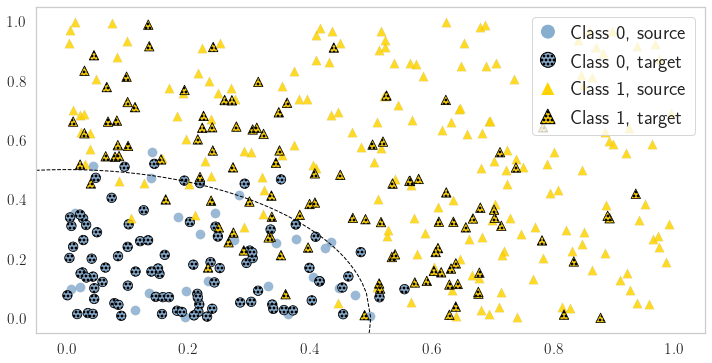

In [80]:
plt.figure(figsize=[12, 6])
plt.scatter(
    x_source[y_source == 0, 0],
    x_source[y_source == 0, 1],
    edgecolor="gray",
    #     linestyle='dashed',
    linewidths=0.1,
    marker='o',
    label='Class 0, source',
                alpha=0.85,
    s=90,
    color=colors[0].reshape(1, -1))

plt.scatter(
    x_target[y_target == 0, 0],
    x_target[y_target == 0, 1],
    edgecolor="black",
    linewidths=0.75,
    marker='o',
    label='Class 0, target',
    hatch=3 * 'o',
    #             alpha=0.9,
    s=90,
    color=colors[0].reshape(1, -1))

plt.scatter(
    x_source[y_source == 1, 0],
    x_source[y_source == 1, 1],
    edgecolor="gray",
    #     linestyle='dashed',
    linewidths=0.1,
    marker='^',
    label='Class 1, source',
                alpha=0.85,
    s=90,
    color=colors[1].reshape(1, -1))

plt.scatter(
    x_target[y_target == 1, 0],
    x_target[y_target == 1, 1],
    edgecolor="black",
    linewidths=0.75,
    marker='^',
    hatch=3 * 'o',
    #                 alpha=0.99,
    s=90,
    color=colors[1].reshape(1, -1),
    label='Class 1, target')

plt.legend(handles=[src_0, targ_0, src_1, targ_1],
           handler_map={
               mpatches.Circle: HandlerEllipse(),
               mpatches.Polygon: PolygonN()
           },
           handlelength=0.75,
           handleheight=0.75,
           loc=1,
           markerscale=1,
           prop={'size': 20})
# plt.legend()

plt.plot(x_circ_tot, y_circ_tot, c='black', linewidth=1, linestyle='dashed')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(False)
plt.savefig('img/benign_covariate_both.pdf', bbox_inches='tight')

In [3]:
[1,2,3,4][2:7]

[3, 4]